# 🏠 Property Rent Price Prediction Model

This notebook demonstrates a simple machine learning pipeline to predict rental property prices using Python, pandas, and scikit-learn.

### 📌 Project Workflow:
- Data Loading and Exploration
- Data Cleaning and Feature Engineering
- Model Training (Linear Regression)
- Model Evaluation (R², MAE)
- Sample Predictions

---

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('lahore-property-rents.csv')
df.head()

,Type,Price,Location,Baths,Area,Beds
0,Upper Portion,PKR45 Thousand,"Wapda Town, Lahore, Punjab",3,10 Marla,2
1,Upper Portion,PKR40 Thousand,"Expo Avenue Society, Lahore, Punjab",3,10 Marla,3
2,Upper Portion,PKR47 Thousand,"Wapda Town, Lahore, Punjab",2,10 Marla,2
3,House,PKR5.95 Lakh,"Gulberg, Lahore, Punjab",7,2 Kanal,6
4,House,PKR5 Lakh,"Muslim Town, Lahore, Punjab",7,2 Kanal,5


In [3]:
df.isna().sum()

Type        0
Price       0
Location    0
Baths       0
Area        0
Beds        0
dtype: int64

In [4]:
Usize = df['Price'].unique()
Usize

array(['PKR45 Thousand', 'PKR40 Thousand', 'PKR47 Thousand',
       'PKR5.95 Lakh', 'PKR5 Lakh', 'PKR15 Lakh', 'PKR4.1 Lakh',
       'PKR4.5 Lakh', 'PKR9.5 Lakh', 'PKR30 Thousand', 'PKR5.5 Lakh',
       'PKR4 Lakh', 'PKR18 Thousand', 'PKR22 Thousand', 'PKR55 Thousand',
       'PKR28 Thousand', 'PKR46 Thousand', 'PKR37 Thousand',
       'PKR36 Thousand', 'PKR75 Thousand', 'PKR50 Thousand',
       'PKR1.4 Lakh', 'PKR13 Thousand', 'PKR65 Thousand', 'PKR1.1 Lakh',
       'PKR2.9 Lakh', 'PKR92 Thousand', 'PKR1.64 Lakh', 'PKR1.45 Lakh',
       'PKR90 Thousand', 'PKR60 Thousand', 'PKR95 Thousand',
       'PKR70 Thousand', 'PKR1.9 Lakh', 'PKR53 Thousand', 'PKR1 Lakh',
       'PKR3.5 Lakh', 'PKR2.8 Lakh', 'PKR2 Lakh', 'PKR3 Lakh',
       'PKR3.35 Lakh', 'PKR3.3 Lakh', 'PKR3.4 Lakh', 'PKR1.8 Lakh',
       'PKR1.5 Lakh', 'PKR2.6 Lakh', 'PKR80 Thousand', 'PKR3.7 Lakh',
       'PKR2.3 Lakh', 'PKR15 Thousand', 'PKR25 Thousand',
       'PKR23 Thousand', 'PKR1.3 Lakh', 'PKR1.85 Lakh', 'PKR38 Thousand'

In [5]:
len(Usize)

305

In [6]:
df.shape

(20510, 6)

In [7]:
df.groupby('Type')['Type'].agg('count')

Type
Farm House         58
Flat             2334
Home                2
House            9190
Lower Portion    2647
Penthouse           6
Room              576
Upper Portion    5697
Name: Type, dtype: int64

In [8]:
df.head()

,Type,Price,Location,Baths,Area,Beds
0,Upper Portion,PKR45 Thousand,"Wapda Town, Lahore, Punjab",3,10 Marla,2
1,Upper Portion,PKR40 Thousand,"Expo Avenue Society, Lahore, Punjab",3,10 Marla,3
2,Upper Portion,PKR47 Thousand,"Wapda Town, Lahore, Punjab",2,10 Marla,2
3,House,PKR5.95 Lakh,"Gulberg, Lahore, Punjab",7,2 Kanal,6
4,House,PKR5 Lakh,"Muslim Town, Lahore, Punjab",7,2 Kanal,5


## Check if there are na values

In [9]:
df['Beds'].unique()

array(['2', '3', '6', '5', '7', '4', '1', '-', '8', '9', '10', '12', '11'],
      dtype=object)

In [10]:
df['Beds'] == '-'

0        False
1        False
2        False
3        False
4        False
         ...  
20505    False
20506    False
20507    False
20508     True
20509    False
Name: Beds, Length: 20510, dtype: bool

In [11]:
df.tail()

,Type,Price,Location,Baths,Area,Beds
20505,Upper Portion,PKR1 Lakh,"Gulberg, Lahore, Punjab",3,1 Kanal,2
20506,Flat,PKR17 Thousand,"Sanda Road, Lahore, Punjab",1,3 Marla,3
20507,Room,PKR23.5 Thousand,"Garden Town, Lahore, Punjab",1,5 Marla,1
20508,Lower Portion,PKR35 Thousand,"State Life Housing Society, Lahore, Punjab",-,7.1 Marla,-
20509,Room,PKR6 Thousand,"Ichhra, Lahore, Punjab",1,0.9 Marla,1


Replace the - with na

In [12]:
df['Beds'] = df['Beds'].replace('-', np.nan)

In [13]:
df.tail()

,Type,Price,Location,Baths,Area,Beds
20505,Upper Portion,PKR1 Lakh,"Gulberg, Lahore, Punjab",3,1 Kanal,2
20506,Flat,PKR17 Thousand,"Sanda Road, Lahore, Punjab",1,3 Marla,3
20507,Room,PKR23.5 Thousand,"Garden Town, Lahore, Punjab",1,5 Marla,1
20508,Lower Portion,PKR35 Thousand,"State Life Housing Society, Lahore, Punjab",-,7.1 Marla,NaN
20509,Room,PKR6 Thousand,"Ichhra, Lahore, Punjab",1,0.9 Marla,1


In [14]:
df['Beds'].unique()

array(['2', '3', '6', '5', '7', '4', '1', nan, '8', '9', '10', '12', '11'],
      dtype=object)

In [15]:
df['Baths'].unique()

array(['3', '2', '7', '10', '6', '8', '5', '1', '4', '-', '9'],
      dtype=object)

In [16]:
df['Baths'] = df['Baths'].replace('-', np.nan)

In [17]:
df['Type'].unique()

array(['Upper Portion', 'House', 'Lower Portion', 'Room', 'Flat',
       'Farm House', 'Penthouse', 'Home'], dtype=object)

In [18]:
df.isna().sum()

Type           0
Price          0
Location       0
Baths       1157
Area           0
Beds        1002
dtype: int64

In [19]:
df['Price'].unique()

array(['PKR45 Thousand', 'PKR40 Thousand', 'PKR47 Thousand',
       'PKR5.95 Lakh', 'PKR5 Lakh', 'PKR15 Lakh', 'PKR4.1 Lakh',
       'PKR4.5 Lakh', 'PKR9.5 Lakh', 'PKR30 Thousand', 'PKR5.5 Lakh',
       'PKR4 Lakh', 'PKR18 Thousand', 'PKR22 Thousand', 'PKR55 Thousand',
       'PKR28 Thousand', 'PKR46 Thousand', 'PKR37 Thousand',
       'PKR36 Thousand', 'PKR75 Thousand', 'PKR50 Thousand',
       'PKR1.4 Lakh', 'PKR13 Thousand', 'PKR65 Thousand', 'PKR1.1 Lakh',
       'PKR2.9 Lakh', 'PKR92 Thousand', 'PKR1.64 Lakh', 'PKR1.45 Lakh',
       'PKR90 Thousand', 'PKR60 Thousand', 'PKR95 Thousand',
       'PKR70 Thousand', 'PKR1.9 Lakh', 'PKR53 Thousand', 'PKR1 Lakh',
       'PKR3.5 Lakh', 'PKR2.8 Lakh', 'PKR2 Lakh', 'PKR3 Lakh',
       'PKR3.35 Lakh', 'PKR3.3 Lakh', 'PKR3.4 Lakh', 'PKR1.8 Lakh',
       'PKR1.5 Lakh', 'PKR2.6 Lakh', 'PKR80 Thousand', 'PKR3.7 Lakh',
       'PKR2.3 Lakh', 'PKR15 Thousand', 'PKR25 Thousand',
       'PKR23 Thousand', 'PKR1.3 Lakh', 'PKR1.85 Lakh', 'PKR38 Thousand'

In [20]:
df['Type'] = df['Type'].replace('-', np.nan)

Converting the price column from string to int and replacing the tense with numbers

In [21]:
def convert_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('PKR', '').strip()
        if 'Thousand' in price_str:
            return float(price_str.replace('Thousand', '').strip()) * 1_000
        elif 'Lakh' in price_str:
            return float(price_str.replace('Lakh', '').strip()) * 100_000
    return None

In [22]:
df['Price_num'] = df['Price'].apply(convert_price)

In [23]:
df.isna().sum()

Type            0
Price           0
Location        0
Baths        1157
Area            0
Beds         1002
Price_num       0
dtype: int64

In [24]:
df['Area'] = df['Area'].replace('-', np.nan)

In [25]:
df2 = df.dropna()

In [26]:
df2.shape

(19227, 7)

In [27]:
df2.isna().sum()

Type         0
Price        0
Location     0
Baths        0
Area         0
Beds         0
Price_num    0
dtype: int64

In [28]:
df['Beds'].dtype

dtype('O')

In [29]:
df['Baths'].dtype

dtype('O')

In [30]:
df.head()

,Type,Price,Location,Baths,Area,Beds,Price_num
0,Upper Portion,PKR45 Thousand,"Wapda Town, Lahore, Punjab",3,10 Marla,2,45000.00
1,Upper Portion,PKR40 Thousand,"Expo Avenue Society, Lahore, Punjab",3,10 Marla,3,40000.00
2,Upper Portion,PKR47 Thousand,"Wapda Town, Lahore, Punjab",2,10 Marla,2,47000.00
3,House,PKR5.95 Lakh,"Gulberg, Lahore, Punjab",7,2 Kanal,6,595000.00
4,House,PKR5 Lakh,"Muslim Town, Lahore, Punjab",7,2 Kanal,5,500000.00


## Convert Area into int num sqrft

In [31]:
df['Area'].unique()

array(['10 Marla', '2 Kanal', '4 Kanal', '1 Kanal', '2.1 Kanal',
       '5 Marla', '2.4 Marla', '3 Marla', '3.6 Marla', '8 Marla',
       '2.5 Marla', '1.8 Marla', '3.1 Marla', '2.2 Marla', '13 Marla',
       '1.5 Kanal', '4 Marla', '6 Marla', '12 Marla', '7 Marla',
       '18 Marla', '1.6 Kanal', '1.2 Kanal', '12.4 Marla', '3.3 Marla',
       '3.8 Marla', '5.4 Marla', '5.5 Marla', '5.9 Marla', '1.2 Marla',
       '7.5 Marla', '1.3 Marla', '15 Marla', '2.1 Marla', '17 Marla',
       '1 Marla', '2 Marla', '5.3 Marla', '14 Marla', '2.7 Marla',
       '2.3 Marla', '1.7 Marla', '3 Kanal', '0.7 Marla', '11.1 Marla',
       '11 Marla', '1.1 Kanal', '3.4 Marla', '1.1 Marla', '9 Marla',
       '7.6 Marla', '1.5 Marla', '16 Marla', '6.5 Marla', '1.4 Marla',
       '2.9 Marla', '1.9 Marla', '2.8 Marla', '2.5 Kanal', '3.5 Marla',
       '1.4 Kanal', '3.5 Kanal', '7.2 Marla', '9.9 Marla', '4.4 Marla',
       '0.1 Marla', '8.8 Marla', '2.6 Marla', '9.5 Marla', '8.9 Marla',
       '12.5 Marla', '0.5

In [32]:
def convert_area_to_sqft(area_str):
    if isinstance(area_str, str):
        area_str = area_str.strip()
        if 'Marla' in area_str:
            value = float(area_str.replace('Marla', '').strip())
            return value * 272.25
        elif 'Kanal' in area_str:
            value = float(area_str.replace('Kanal', '').strip())
            return value * 5445
    return None

In [33]:
df['area_sqft'] = df['Area'].apply(convert_area_to_sqft)

In [34]:
df.head()

,Type,Price,Location,Baths,Area,Beds,Price_num,area_sqft
0,Upper Portion,PKR45 Thousand,"Wapda Town, Lahore, Punjab",3,10 Marla,2,45000.00,2722.50
1,Upper Portion,PKR40 Thousand,"Expo Avenue Society, Lahore, Punjab",3,10 Marla,3,40000.00,2722.50
2,Upper Portion,PKR47 Thousand,"Wapda Town, Lahore, Punjab",2,10 Marla,2,47000.00,2722.50
3,House,PKR5.95 Lakh,"Gulberg, Lahore, Punjab",7,2 Kanal,6,595000.00,10890.00
4,House,PKR5 Lakh,"Muslim Town, Lahore, Punjab",7,2 Kanal,5,500000.00,10890.00


In [35]:
df['area_sqft'].unique()

array([2.722500e+03, 1.089000e+04, 2.178000e+04, 5.445000e+03,
       1.143450e+04, 1.361250e+03, 6.534000e+02, 8.167500e+02,
       9.801000e+02, 2.178000e+03, 6.806250e+02, 4.900500e+02,
       8.439750e+02, 5.989500e+02, 3.539250e+03, 8.167500e+03,
       1.089000e+03, 1.633500e+03, 3.267000e+03, 1.905750e+03,
       4.900500e+03, 8.712000e+03, 6.534000e+03, 3.375900e+03,
       8.984250e+02, 1.034550e+03, 1.470150e+03, 1.497375e+03,
       1.606275e+03, 3.267000e+02, 2.041875e+03, 3.539250e+02,
       4.083750e+03, 5.717250e+02, 4.628250e+03, 2.722500e+02,
       5.445000e+02, 1.442925e+03, 3.811500e+03, 7.350750e+02,
       6.261750e+02, 4.628250e+02, 1.633500e+04, 1.905750e+02,
       3.021975e+03, 2.994750e+03, 5.989500e+03, 9.256500e+02,
       2.994750e+02, 2.450250e+03, 2.069100e+03, 4.083750e+02,
       4.356000e+03, 1.769625e+03, 3.811500e+02, 7.895250e+02,
       5.172750e+02, 7.623000e+02, 1.361250e+04, 9.528750e+02,
       7.623000e+03, 1.905750e+04, 1.960200e+03, 2.6952

In [36]:
df.isna().sum()

Type            0
Price           0
Location        0
Baths        1157
Area            0
Beds         1002
Price_num       0
area_sqft       0
dtype: int64

In [37]:
df['Beds'] = df['Beds'].astype(float)

In [38]:
df['Beds'] = df['Beds'].fillna(df['Beds'].median())

In [39]:
df.head()

,Type,Price,Location,Baths,Area,Beds,Price_num,area_sqft
0,Upper Portion,PKR45 Thousand,"Wapda Town, Lahore, Punjab",3,10 Marla,2.00,45000.00,2722.50
1,Upper Portion,PKR40 Thousand,"Expo Avenue Society, Lahore, Punjab",3,10 Marla,3.00,40000.00,2722.50
2,Upper Portion,PKR47 Thousand,"Wapda Town, Lahore, Punjab",2,10 Marla,2.00,47000.00,2722.50
3,House,PKR5.95 Lakh,"Gulberg, Lahore, Punjab",7,2 Kanal,6.00,595000.00,10890.00
4,House,PKR5 Lakh,"Muslim Town, Lahore, Punjab",7,2 Kanal,5.00,500000.00,10890.00


In [40]:
df['Baths'] = df['Baths'].astype(float)

In [41]:
df['Baths'] = df['Baths'].fillna(df['Baths'].median())

In [42]:
df['price_per_sqft'] = df['Price_num']*1000/ df['area_sqft']
df.head()

,Type,Price,Location,Baths,Area,Beds,Price_num,area_sqft,price_per_sqft
0,Upper Portion,PKR45 Thousand,"Wapda Town, Lahore, Punjab",3.00,10 Marla,2.00,45000.00,2722.50,16528.93
1,Upper Portion,PKR40 Thousand,"Expo Avenue Society, Lahore, Punjab",3.00,10 Marla,3.00,40000.00,2722.50,14692.38
2,Upper Portion,PKR47 Thousand,"Wapda Town, Lahore, Punjab",2.00,10 Marla,2.00,47000.00,2722.50,17263.54
3,House,PKR5.95 Lakh,"Gulberg, Lahore, Punjab",7.00,2 Kanal,6.00,595000.00,10890.00,54637.28
4,House,PKR5 Lakh,"Muslim Town, Lahore, Punjab",7.00,2 Kanal,5.00,500000.00,10890.00,45913.68


## converting the location name to other which has less then 10 rows in groupby function so it is easy for us in onehot encoder

In [43]:
len(df.Location.unique())

461

In [44]:
df.Location = df.Location.apply(lambda x: x.strip())

location_stats = df.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
from IPython.display import display
display(location_stats)

Location
DHA Defence, Lahore, Punjab                         4942
Bahria Town, Lahore, Punjab                         2093
Askari, Lahore, Punjab                              1178
Johar Town, Lahore, Punjab                          1035
Gulberg, Lahore, Punjab                              723
                                                    ... 
Al-Wahab Garden - Phase 1, Lahore, Punjab              1
Al-Kareem Premier Housing Scheme, Lahore, Punjab       1
Wocland Villas, Lahore, Punjab                         1
Yasrab Colony, Lahore, Punjab                          1
Zohra Homes, Lahore, Punjab                            1
Name: Location, Length: 461, dtype: int64

In [45]:
len(location_stats[location_stats<10])

311

In [46]:
location_stat_less_then_10 = location_stats[location_stats<=10]

In [47]:
df.Location = df.Location.apply(lambda x: 'others' if x in location_stat_less_then_10 else x)
len(df.Location.unique())

137

In [48]:
df.shape

(20510, 9)

In [49]:
df.loc[20506]

Type                        Flat
Price             PKR17 Thousand
Location                  others
Baths                       1.00
Area                     3 Marla
Beds                        3.00
Price_num               17000.00
area_sqft                 816.75
price_per_sqft          20814.20
Name: 20506, dtype: object

In [50]:
df[df.area_sqft/df.Beds<300].head()
df.shape

(20510, 9)

In [51]:
df4 = df[~(df.area_sqft/df.Beds<300)]
df4.shape

(19469, 9)

In [52]:
df4.price_per_sqft.describe()

count    19469.00
mean     31036.29
std      18883.38
min        675.20
25%      16528.93
50%      25711.66
75%      41978.22
max     279720.28
Name: price_per_sqft, dtype: float64

In [53]:
def filter_price_per_sqft_within_std(df):
    mean = df['price_per_sqft'].mean()
    std = df['price_per_sqft'].std()
    lower_bound = mean - std
    upper_bound = mean + std
    return df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [54]:
df5 = filter_price_per_sqft_within_std(df4)

In [55]:
df5.shape

(15046, 9)

In [56]:
df5.price_per_sqft.describe()

count   15046.00
mean    27086.85
std     10963.67
min     12243.65
25%     17447.20
50%     24487.30
75%     36730.95
max     49849.14
Name: price_per_sqft, dtype: float64

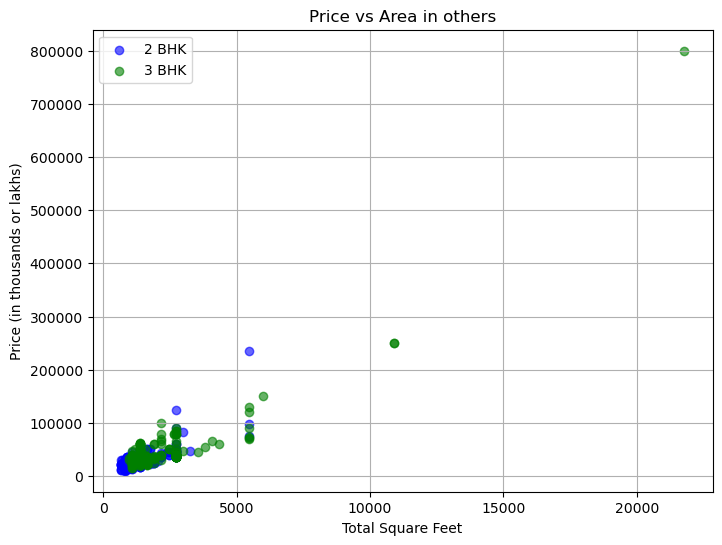

In [57]:
def plot_scatter(df, location):
    bhk2 = df[(df['Location'] == location) & (df['Beds'] == 2)]
    bhk3 = df[(df['Location'] == location) & (df['Beds'] == 3)]

    plt.figure(figsize=(8,6))
    plt.scatter(bhk2['area_sqft'], bhk2['Price_num'], color='blue', label='2 BHK', alpha=0.6)
    plt.scatter(bhk3['area_sqft'], bhk3['Price_num'], color='green', label='3 BHK', alpha=0.6)

    plt.xlabel('Total Square Feet')
    plt.ylabel('Price (in thousands or lakhs)')
    plt.title(f'Price vs Area in {location}')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_scatter(df5, 'others')

Text(0, 0.5, 'count')

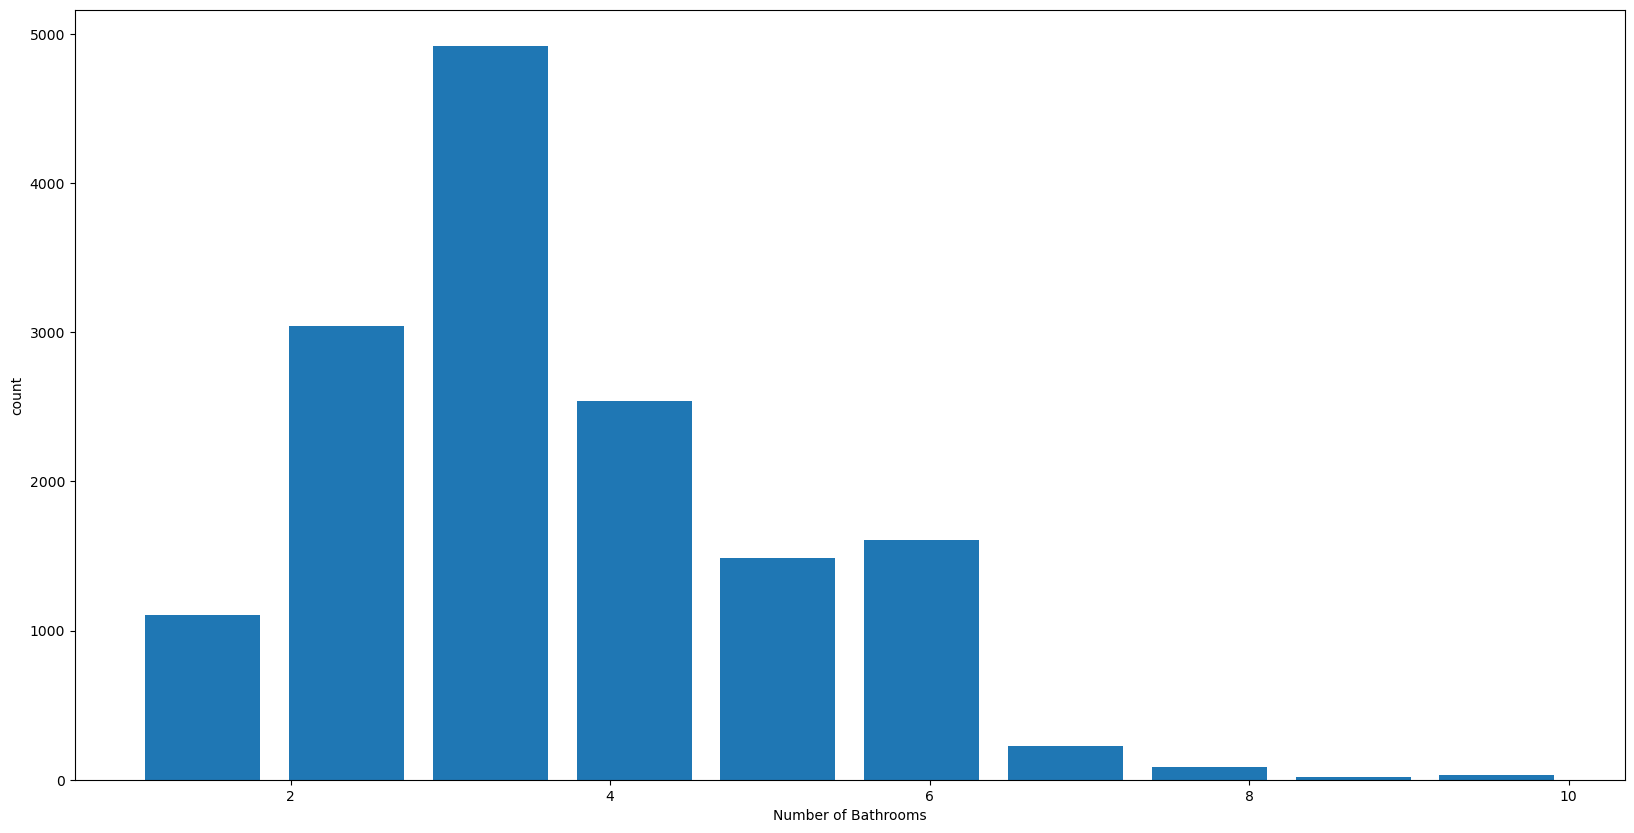

In [58]:
plt.hist(df5.Baths, rwidth = 0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('count')

In [59]:
df5.Baths.unique()

array([ 3.,  2.,  7.,  6.,  1.,  4.,  5.,  8., 10.,  9.])

In [60]:
len(df5[df5.Baths>df5.Beds+2])

23

In [61]:
df6 = df5[df5.Baths<df5.Beds+2]

In [62]:
df6.shape

(14770, 9)

In [63]:
df6.head()

,Type,Price,Location,Baths,Area,Beds,Price_num,area_sqft,price_per_sqft
0,Upper Portion,PKR45 Thousand,"Wapda Town, Lahore, Punjab",3.00,10 Marla,2.00,45000.00,2722.50,16528.93
1,Upper Portion,PKR40 Thousand,others,3.00,10 Marla,3.00,40000.00,2722.50,14692.38
2,Upper Portion,PKR47 Thousand,"Wapda Town, Lahore, Punjab",2.00,10 Marla,2.00,47000.00,2722.50,17263.54
8,House,PKR4.5 Lakh,"Gulberg, Lahore, Punjab",6.00,2 Kanal,6.00,450000.00,10890.00,41322.31
10,Lower Portion,PKR30 Thousand,Government Employees Cooperative Housing Socie...,2.00,5 Marla,2.00,30000.00,1361.25,22038.57


In [64]:
df7 = df6.drop(['Price', 'Area', 'price_per_sqft'], axis=1)
df7.head()

,Type,Location,Baths,Beds,Price_num,area_sqft
0,Upper Portion,"Wapda Town, Lahore, Punjab",3.00,2.00,45000.00,2722.50
1,Upper Portion,others,3.00,3.00,40000.00,2722.50
2,Upper Portion,"Wapda Town, Lahore, Punjab",2.00,2.00,47000.00,2722.50
8,House,"Gulberg, Lahore, Punjab",6.00,6.00,450000.00,10890.00
10,Lower Portion,Government Employees Cooperative Housing Socie...,2.00,2.00,30000.00,1361.25


In [65]:
df7.isna().sum()

Type         0
Location     0
Baths        0
Beds         0
Price_num    0
area_sqft    0
dtype: int64

## OneHotEncoder to convert the categorical feature into numerical feature

In [66]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = ohe.fit_transform(df7[['Location']])
columns = ohe.get_feature_names_out(['Location'])

# Turn it into a DataFrame
import pandas as pd
encoded_df = pd.DataFrame(encoded, columns=columns)

# Combine with the rest of the original dataframe
location_df = pd.DataFrame(encoded_df, columns=ohe.get_feature_names_out(['Location']))
location_df.reset_index(drop=True, inplace=True)
df7_nolocation = df7.drop('Location', axis=1).reset_index(drop=True)

# Concatenate
df8 = pd.concat([df7_nolocation, location_df], axis=1)

In [67]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = ohe.fit_transform(df7[['Type']])
columns = ohe.get_feature_names_out(['Type'])

# Turn it into a DataFrame
import pandas as pd
encoded_df = pd.DataFrame(encoded, columns=columns)

# Combine with the rest of the original dataframe
type_df = pd.DataFrame(encoded_df, columns=ohe.get_feature_names_out(['Type']))
type_df.reset_index(drop=True, inplace=True)
df_notype = df8.drop('Type', axis=1).reset_index(drop=True)

# Concatenate
df9 = pd.concat([df_notype, type_df], axis=1)

In [68]:
df9.isna().sum()

Baths                                     0
Beds                                      0
Price_num                                 0
area_sqft                                 0
Location_Aashiana Road, Lahore, Punjab    0
                                         ..
Type_House                                0
Type_Lower Portion                        0
Type_Penthouse                            0
Type_Room                                 0
Type_Upper Portion                        0
Length: 149, dtype: int64

In [69]:
Y = df9['Price_num']
X = df9.drop('Price_num', axis=1)

In [70]:
X.head()
Y.head()

0    45000.00
1    40000.00
2    47000.00
3   450000.00
4    30000.00
Name: Price_num, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.2, random_state=42
)


In [72]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8376420158571906

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state = 0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.83776876, 0.83876621, 0.83715183, 0.83205739, 0.84389192])

In [74]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.905740542856214

In [75]:
score =cross_val_score(clf, X, Y, cv=cv)

In [76]:
score.mean()

np.float64(0.9239600987399095)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
}

grid = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)

In [ ]:
clf = RandomForestRegressor(max_depth = 20, n_estimators = 200, random_state =42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
X.columns

In [ ]:
new_data = pd.DataFrame({
    'Baths': [6],
    'Beds': [6],
    'area_sqft': [10000],
    'Location': ['Gulberg, Lahore, Punjab'],
    'Type': ['House'] # categorical
})

In [ ]:
new_data_encoded = pd.get_dummies(new_data, columns=['Type', 'Location'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for col in X.columns:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

In [ ]:
new_data_encoded = new_data_encoded[X.columns]

In [ ]:
pred = clf.predict(new_data_encoded)
print("Prediction:", pred)

In [ ]:
importances = clf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

In [ ]:
feat_imp_df[feat_imp_df['Importance'] >= 0.001].plot(
    x='Feature',
    y='Importance',
    kind='bar',
    legend=False,
    title='Features with Importance >= 0.001'
)

## Name the location columns other which have 0 importance

In [ ]:
len(df9.filter(like='Type', axis=1))

In [ ]:
df9.head()

In [ ]:
# df9.columns = [col if col in important_cols else 'others' for col in df9.columns]

In [ ]:
# df9.head()

## Drop the columns which have feature importance less then 0.001

In [ ]:
# df9.shape

In [ ]:
# important_cols = [
#     'area_sqft',
#     'Type_House',
#     'Beds',
#     'Baths',
#     'Location_Gulberg, Lahore, Punjab',
#     'Location_DHA Defence, Lahore, Punjab',
#     'Location_Askari, Lahore, Punjab',
#     'Price_num',
#     'Type_Farm House',
#     'Type_Flat',	
#     'Type_Home',
#     'Type_LowerPortion',	
#     'Type_Penthouse',
#     'Type_Room',
#     'Type_UpperPortion'
# ]

In [ ]:
# df10 = df9[important_cols]

In [ ]:
# df10.shape

In [ ]:
# df10.head()

In [ ]:
# y = df10['Price_num']
# X = df10.drop('Price_num', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
# clf_1 = RandomForestRegressor()
# clf_1.fit(X_train, y_train)
# clf_1.score(X_test, y_test)

In [ ]:
# clf_1_f_i = clf_1.feature_importances_
# columns_name = X_train.columns

# feat_imp_1 = pd.DataFrame({
#     'feature': columns_name,
#     'importance': clf_1_f_i
# }).sort_values(by='importance', ascending = False)

# feat_imp_1

In [ ]:
# new_data_1 = pd.DataFrame({
#     'Baths': [6],
#     'Beds': [6],
#     'area_sqft': [10000],
#     'Location': ['Gulberg, Lahore, Punjab'],
#     'Type': ['House']
# })

In [ ]:
# new_data_1_encoded = pd.get_dummies(new_data_1, columns=['Type', 'Location'])

In [ ]:
# for col in X.columns:
#     if col not in new_data_1_encoded.columns:
#         new_data_1_encoded[col] = 0

In [ ]:
# new_data_1_encoded = new_data_1_encoded[X.columns]

In [ ]:
# pred = clf_1.predict(new_data_1_encoded)
# print("Prediction:", pred)

## Save the model

In [ ]:
import pickle
with open('Lahore_property_rent_prediction_1.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [ ]:
import pickle
with open('Lahore_property_rent_prediction_1.pickle', 'rb') as f:
    model = pickle.load(f)

In [ ]:
model.predict(new_data_encoded)

In [ ]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns_1.json', 'w') as f:
    f.write(json.dumps(columns))

In [ ]:
data_columns =[col.lower() for col in X.columns]
location_end_index = max(i for i, col in enumerate(data_columns) if col.startswith("location_"))

print(f"'location_' columns end at index: {location_end_index}")

In [ ]:
len(X.columns)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming y_test and y_pred are already defined
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


---  
## 📊 Model Evaluation

We use **R² Score** and **Mean Absolute Error (MAE)** to evaluate model performance.

## ✅ Sample Prediction and Summary

Below is a demonstration of the model making predictions on sample input.

---

Thanks for checking out this project!  
🔗 [Connect with me on LinkedIn](https://www.linkedin.com) | 💻 [View Code on GitHub](https://github.com)

#MachineLearning #DataScience #Python #RealEstate #RegressionModel
